***BUSINESS UNDERSTANDING***

Tujuan:
Membangun model klasifikasi untuk memprediksi tingkat kepuasan pengguna
aplikasi e-learning (puas / tidak puas) berdasarkan data survei pengguna.

Tipe masalah:
Binary Classification

Pendekatan:
Menggunakan dua algoritma:
1. Logistic Regression (baseline, interpretable)
2. Decision Tree (non-linear, rule-based)

Evaluasi:
Accuracy, Precision, Recall, F1-score, Confusion Matrix, ROC-AUC



***DATA UNDERSTANDING***

*2.1 Import Library*

In [1]:
# Install & import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


*2.2 Load Dataset*

In [2]:
df = pd.read_csv('dataset_kepuasan_pengguna_elearning.csv')
df.head()

,id_responden,usia,jenis_kelamin,durasi_penggunaan,frekuensi_login,kualitas_materi,kemudahan_penggunaan,stabilitas_aplikasi,interaksi_pengajar,kepuasan_pengguna
0,R0001,27,L,3.2,3,4.0,4,5.0,3,1
1,R0002,33,L,2.4,6,5.0,4,2.0,4,1
2,R0003,22,L,3.1,1,2.0,4,5.0,4,1
3,R0004,34,P,3.2,3,4.0,5,1.0,1,0
4,R0005,34,L,4.8,3,4.0,4,4.0,2,1


*2.3 Informasi Dataset*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_responden          505 non-null    object 
 1   usia                  505 non-null    int64  
 2   jenis_kelamin         505 non-null    object 
 3   durasi_penggunaan     474 non-null    float64
 4   frekuensi_login       505 non-null    int64  
 5   kualitas_materi       474 non-null    float64
 6   kemudahan_penggunaan  505 non-null    int64  
 7   stabilitas_aplikasi   474 non-null    float64
 8   interaksi_pengajar    505 non-null    int64  
 9   kepuasan_pengguna     505 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 39.6+ KB


*2.4 Statistik Deskriptif*

In [4]:
df.describe()

,usia,durasi_penggunaan,frekuensi_login,kualitas_materi,kemudahan_penggunaan,stabilitas_aplikasi,interaksi_pengajar,kepuasan_pengguna
count,505.000000,474.000000,505.000000,474.000000,505.000000,474.000000,505.000000,505.000000
mean,26.023762,3.288819,4.011881,3.124473,3.091089,2.976793,2.914851,0.500990
std,5.011042,1.662095,2.008874,1.382200,1.416884,1.441418,1.453880,0.500495
min,18.000000,0.300000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,21.000000,1.825000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000
50%,26.000000,3.300000,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,30.000000,4.800000,6.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,34.000000,6.000000,7.000000,5.000000,5.000000,5.000000,5.000000,1.000000


*2.5 Cek Missing Values*

In [5]:
df.isnull().sum()

id_responden             0
usia                     0
jenis_kelamin            0
durasi_penggunaan       31
frekuensi_login          0
kualitas_materi         31
kemudahan_penggunaan     0
stabilitas_aplikasi     31
interaksi_pengajar       0
kepuasan_pengguna        0
dtype: int64

*2.6 Cek Duplikasi Data*

In [6]:
df.duplicated().sum()

np.int64(5)

*2.7 Distribusi Target*

In [7]:
target_counts = df['kepuasan_pengguna'].value_counts()
target_counts

kepuasan_pengguna
1    253
0    252
Name: count, dtype: int64

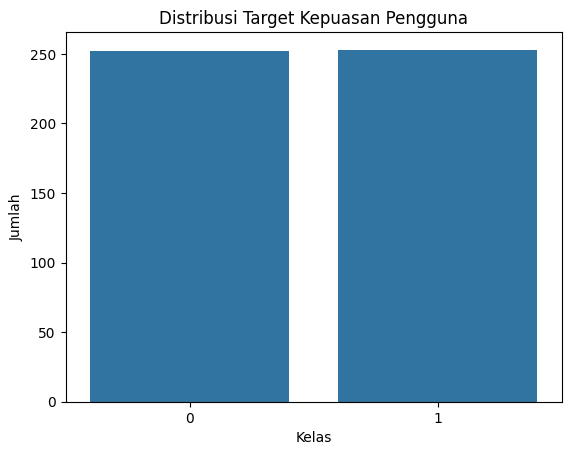

In [8]:
plt.figure()
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribusi Target Kepuasan Pengguna')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

Interpretasi : Hasil analisis distribusi target menunjukkan bahwa kelas kepuasan_pengguna relatif seimbang antara pengguna puas dan tidak puas. Kondisi ini mengindikasikan bahwa dataset tidak mengalami permasalahan class imbalance, sehingga model klasifikasi dapat dilatih tanpa perlu menerapkan teknik penyeimbangan kelas tambahan. Selain itu, metrik evaluasi seperti accuracy, precision, recall, dan F1-score dapat digunakan secara lebih representatif

***DATA PREPROCESSING***

*3.2 Hapus Kolom Tidak Relevan*

In [9]:
df = df.drop(columns=['id_responden'])

In [10]:
df.dtypes

usia                      int64
jenis_kelamin            object
durasi_penggunaan       float64
frekuensi_login           int64
kualitas_materi         float64
kemudahan_penggunaan      int64
stabilitas_aplikasi     float64
interaksi_pengajar        int64
kepuasan_pengguna         int64
dtype: object

*3.1 Pisahkan Fitur & Target*

In [11]:
X = df.drop(columns=['kepuasan_pengguna'])
y = df['kepuasan_pengguna']

*3.3 Deteksi Kolom 100% Missing*

In [12]:
X.isna().sum()

usia                     0
jenis_kelamin            0
durasi_penggunaan       31
frekuensi_login          0
kualitas_materi         31
kemudahan_penggunaan     0
stabilitas_aplikasi     31
interaksi_pengajar       0
dtype: int64

In [13]:
kolom_kosong = X.columns[X.isna().all()]
kolom_kosong

Index([], dtype='object')

In [14]:
X = X.drop(columns=kolom_kosong)

*ENCODING*

In [15]:
X['jenis_kelamin'] = X['jenis_kelamin'].map({
    'L': 1,
    'P': 0
})


*3.4 Imputasi missing values*

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_imputed = pd.DataFrame(
    imputer.fit_transform(X),
    columns=X.columns
)


*3.5 Split Data Train & Test*

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


***MODELLING***

*4.1 Logistic Regression*

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]


*4.2 Decision Tree*

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]


***EVALUATION***

*5.1 Metrik Evaluasi*

In [20]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

*5.2 Evaluasi Logistic Regression*

In [21]:
print("LOGISTIC REGRESSION")
print("Accuracy :", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall   :", recall_score(y_test, y_pred_logreg))
print("F1-score :", f1_score(y_test, y_pred_logreg))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_logreg))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

LOGISTIC REGRESSION
Accuracy : 0.9603960396039604
Precision: 0.9433962264150944
Recall   : 0.9803921568627451
F1-score : 0.9615384615384616
ROC-AUC  : 0.988235294117647

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.94      0.98      0.96        51

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



*5.3 Evaluasi Decision Tree*

In [22]:
print("DECISION TREE")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1-score :", f1_score(y_test, y_pred_dt))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


DECISION TREE
Accuracy : 0.7920792079207921
Precision: 0.7777777777777778
Recall   : 0.8235294117647058
F1-score : 0.8
ROC-AUC  : 0.8458823529411765

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78        50
           1       0.78      0.82      0.80        51

    accuracy                           0.79       101
   macro avg       0.79      0.79      0.79       101
weighted avg       0.79      0.79      0.79       101



*5.4 Perbandingan Model*

In [23]:
hasil = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_dt)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_logreg),
        f1_score(y_test, y_pred_dt)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_prob_logreg),
        roc_auc_score(y_test, y_prob_dt)
    ]
})

hasil


,Model,Accuracy,F1-score,ROC-AUC
0,Logistic Regression,0.960396,0.961538,0.988235
1,Decision Tree,0.792079,0.800000,0.845882
